# Echelle Grating Blaze Function Fitting in Python

This notebook describes and shows an example of fitting the echelle grating blaze function of the CHIRON Spectrometer in Python.

In [151]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
myfigsize = (12.0, 8.0)
myfontsize = 14.
plt.rcParams['figure.figsize'] = myfigsize

In [3]:
hdulist = fits.open('/tous/mir7/fitspec/141029/achi141029.1143.fits')

In [4]:
scidata = hdulist[0].data

In [5]:
scidata.shape

(62, 3200, 2)

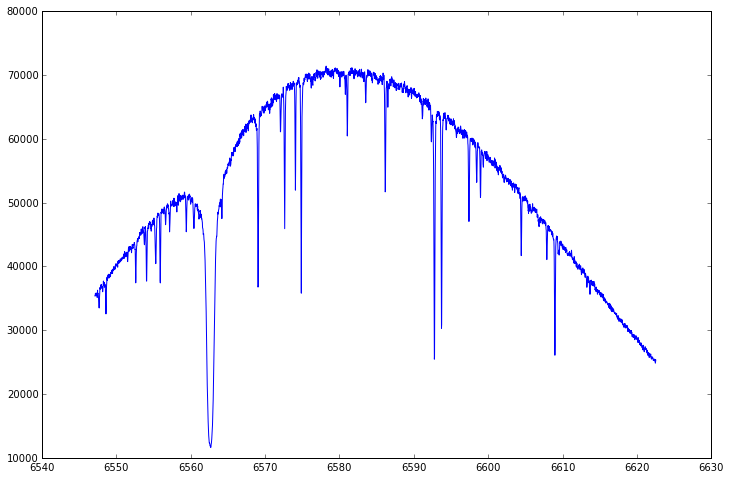

In [6]:
ord = 39
wav = scidata[ord,:,0]
spec = scidata[ord,:,1]
plt.plot(wav, spec)

In [7]:
from pyutil.blazeFit import blazeFit

In [8]:
maxrms = 0.005
z = blazeFit(wav, spec, maxrms, numcalls=50)

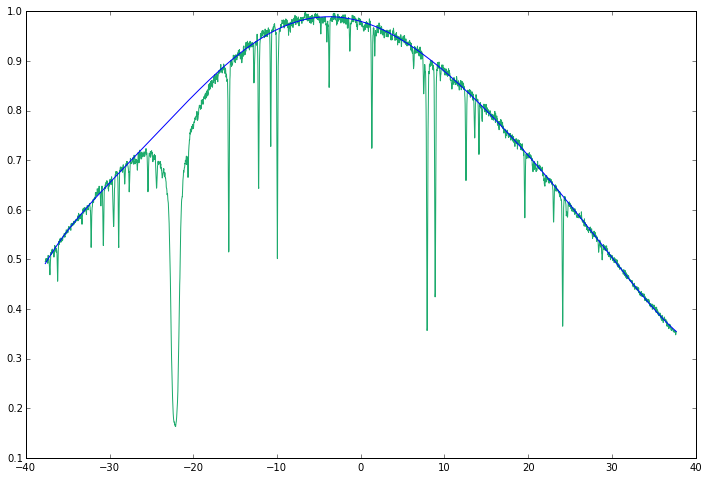

In [11]:
#get wavelength range:
wavspread = max(wav) - min(wav)

#center wavelength range about zero:
wavcent = wav - min(wav) - wavspread/2.

#normalize the spectrum:
normspec = spec/max(spec)

#make a function based on those 
#polynomial coefficients:
cfit = np.poly1d(z)

#plot the original spectrum:
plt.plot(wavcent, normspec, color='#1DAB6D')

#overplot the continuum fit
plt.plot(wavcent, cfit(wavcent))

(6547.1362, 6622.519)

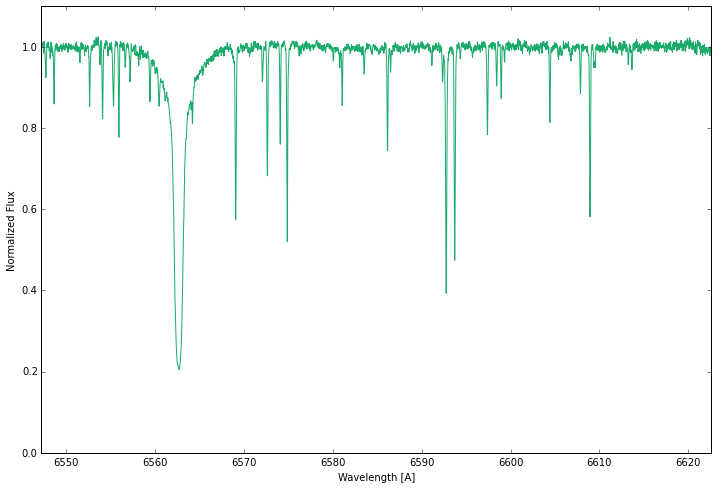

In [12]:
plt.plot(wav, normspec/cfit(wavcent), color='#1DAB6D')
plt.xlabel('Wavelength [A]')
plt.ylabel('Normalized Flux')
plt.ylim([0,1.1])
plt.xlim([min(wav), max(wav)])

In [13]:
print(z)

[  3.04013031e-12  -5.53105111e-11  -7.96952275e-09   2.30547404e-07
   7.33804398e-06  -6.07804153e-04  -4.87157730e-03   9.79861969e-01]


## Debugging Code

The code and comments in the section below were used in the debugging process and are most likely not useful. 

In [13]:
from astropy.io import fits

hdulist = fits.open('/tous/mir7/fitspec/141029/achi141029.1143.fits')

In [14]:
hdulist[0].header

 [astropy.io.fits.verify]



SIMPLE  =                    T / Written by IDL:  Fri Oct 31 15:28:19 2014      
BITPIX  =                  -32 / IEEE single precision floating point           
NAXIS   =                    3 /Number of data axes                             
NAXIS1  =                    2 /Axis 1 length: 0=wavelength, 1=spectrum         
NAXIS2  =                 3200 /Axis 2 length: extracted pixels along each echel
NAXIS3  =                   62 /Axis 3 length: number of echelle orders extracte
EXTEND  =                    T / FITS dataset may contain extensions            
RESOLUTN=        96791.6344732 /Resolution determined from the ThAr.            
THIDNLIN=                 1453 /Number of ThAr lines used for wav soln.         
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                    0 / offset data range to that of unsigned short    
BSCALE  =                   

In [15]:
scidata.shape

(62, 3200, 2)

[ -2.39859311e-10  -3.33437309e-09   6.96914115e-07   4.83818269e-06
  -9.00314538e-04  -3.09177122e-03   9.81219635e-01]


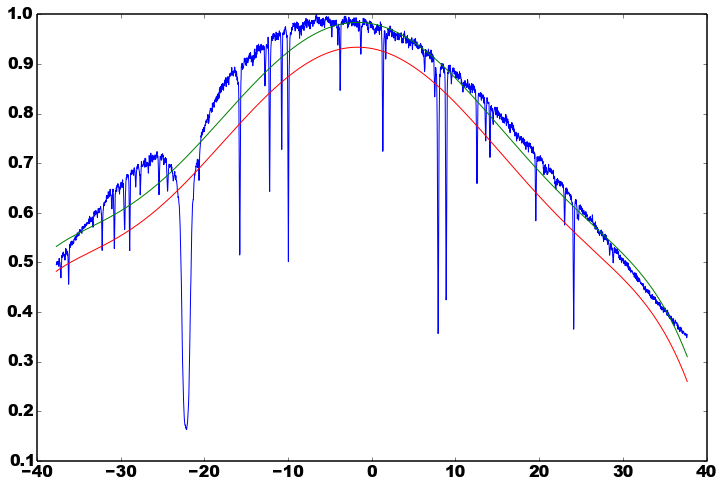

In [16]:
#get the full wavelength range to center about zero:
wavspread = max(wav) - min(wav)

#now change the wavelength range:
wavcent0 = wav - min(wav) - wavspread/2.

#normalize the spectrum:
normspec0 = spec/max(spec)

#fit a polynomial to the data:
z0 = np.polyfit(wavcent0, normspec0, 6)
print(z0)
#now make a function based on those 
#polynomial coefficients:
cfit0 = np.poly1d(z0)

#plot the original spectrum:
plt.plot(wavcent0, normspec0)
#and overplot the fit
plt.plot(wavcent0, cfit0(wavcent0))
thresh0 = cfit0(wavcent0)-0.05
plt.plot(wavcent0, thresh0)

[  8.06949803e-12  -1.10398875e-10  -2.04345309e-08   3.80834951e-07
   1.56214986e-05  -7.10324351e-04  -5.65864546e-03   9.81527762e-01]


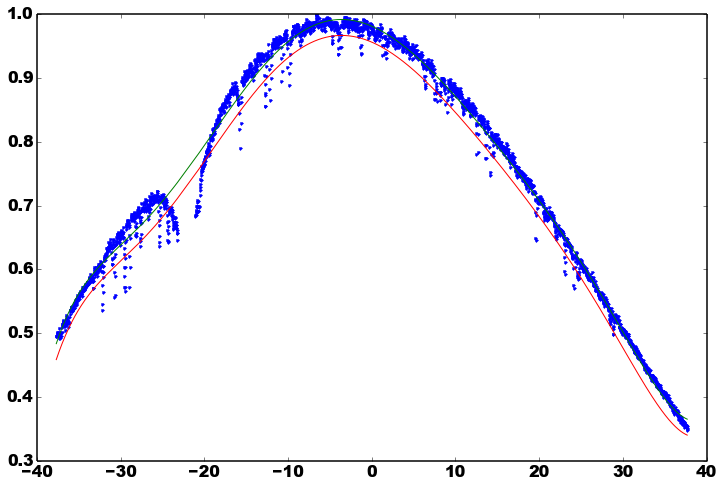

In [17]:
mask1 = np.where(normspec0 > thresh0)[0]

#normalize the spectrum:
newspec1 = normspec0[mask1]

normspec1 = newspec1/max(newspec1)

wavcent1 = wavcent0[mask1]

#fit a polynomial to the data:
z1 = np.polyfit(wavcent1, normspec1, 7)
print(z1)
#now make a function based on those 
#polynomial coefficients:
cfit1 = np.poly1d(z1)

#plot the original spectrum:
plt.plot(wavcent1, normspec1, '.')
#and overplot the fit
plt.plot(wavcent1, cfit1(wavcent1))
thresh1 = cfit1(wavcent1)-0.025
plt.plot(wavcent1, thresh1)
mask2 = np.where(normspec1 > thresh1)[0]

In [18]:
print(len(normspec1))
print(len(mask2))

2998
2807


[  5.60728842e-12  -8.47855142e-11  -1.42862635e-08   3.08468128e-07
   1.15033974e-05  -6.59401696e-04  -5.26300034e-03   9.80416274e-01]


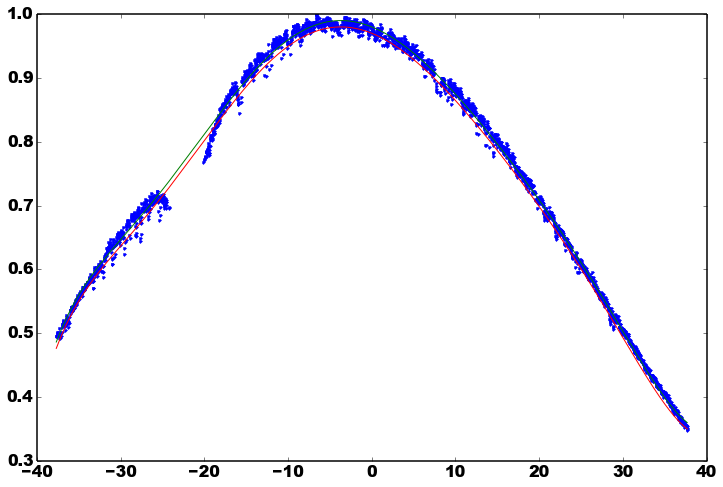

In [19]:
normspec2 = normspec1[mask2]
wavcent2 = wavcent1[mask2]

#fit a polynomial to the data:
z2 = np.polyfit(wavcent2, normspec2, 7)
print(z2)
#now make a function based on those 
#polynomial coefficients:
cfit2 = np.poly1d(z2)

#plot the original spectrum:
plt.plot(wavcent2, normspec2, '.')
#and overplot the fit
plt.plot(wavcent2, cfit2(wavcent2))
thresh2 = cfit2(wavcent2)-0.01
plt.plot(wavcent2, thresh2)
mask3 = np.where(normspec2 > thresh2)[0]

[  4.29578389e-12  -6.93738074e-11  -1.10776383e-08   2.67811688e-07
   9.41254387e-06  -6.33011588e-04  -5.08330095e-03   9.80981656e-01]


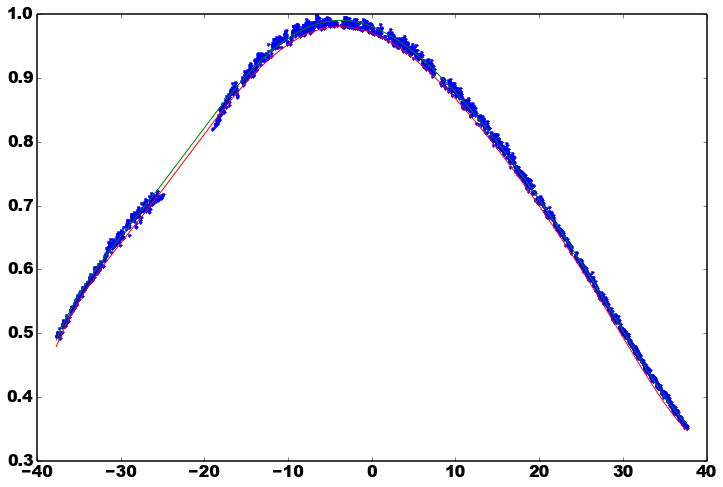

In [20]:
normspec3 = normspec2[mask3]
wavcent3 = wavcent2[mask3]

#fit a polynomial to the data:
z3 = np.polyfit(wavcent3, normspec3, 7)
print(z3)
#now make a function based on those 
#polynomial coefficients:
cfit3 = np.poly1d(z3)

#plot the original spectrum:
plt.plot(wavcent3, normspec3, '.')
#and overplot the fit
plt.plot(wavcent3, cfit3(wavcent3))
thresh3 = cfit3(wavcent3)-0.01
plt.plot(wavcent3, thresh3)
mask4 = np.where(normspec3 > thresh3)[0]

#### Now to divide by the blaze fit and calculate the rms

To determine how good our fit is, we can divide by out continuum fit and check our rms.

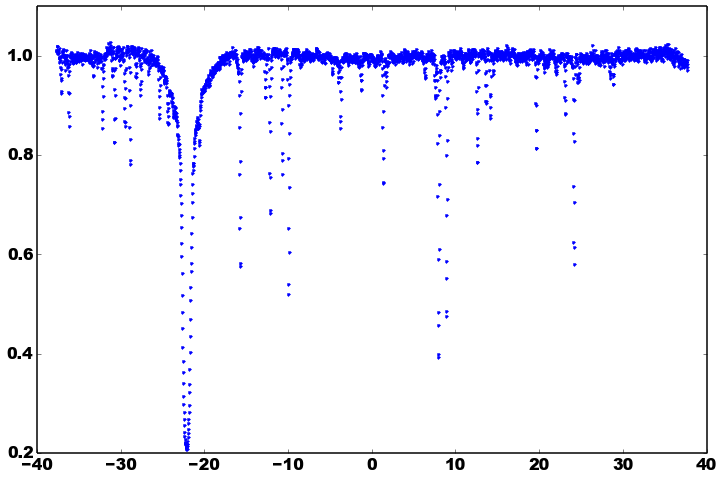

In [21]:
#Here's what the full spectrum looks like:
plt.plot(wavcent0, normspec0/cfit3(wavcent0), '.')

The rms is: 0.008)


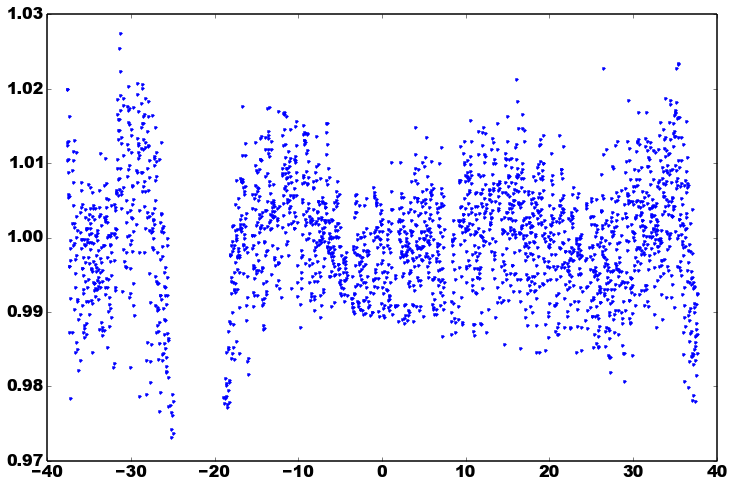

In [22]:
#And here's our continuum:
plt.plot(wavcent3, normspec3/cfit3(wavcent3), '.')
print('The rms is: {0:.3f})'.format(np.std(normspec3/cfit3(wavcent3))))

### Making a Recursive Continuum-Fitting Function

So the fit here is good to 0.8%. Now we'll make the fit good to some user-specified level by creating a recursive function. The recursive function will fit for the continuum, discard points below some threshold, refit the continuum, discard more points, and so on until we hit that user-specified level for the rms of the residuals.

In [25]:
def blazeFit(wav, spec, maxrms, numcalls=10, curcall=0, verbose=False, showplot=False):
    """PURPOSE: To fit the continuum of an order of an 
    echelle spectrum to model the Blaze Function.
    INPUTS:
    WAV: The wavelength 
    SPEC: The spectrum. This should be the same number of elements 
    (and corrsepond to) the input wavelength array (wav).
    MAXRMS: The threshold criteria for the fit in normalized rms. 
    For example, a threshold of 0.01 will keep iterating until 
    the rms of the residuals of dividing the continuum pixels
    by the Blaze Function comes out to 1%.
    NUMCALLS: The maximum number of recursive iterations to execute.
    CURCALL: Store the current iteration for recursive purposes.
    VERBOSE: Set this to True to print out the iteration, residual
    rms and the threshold value.
    SHOWPLOT: Set this to True to produce a plot of the spectrum, 
    threshold and continuum at every iteration.
    """
    #get wavelength range:
    wavspread = max(wav) - min(wav)

    #center wavelength range about zero:
    wavcent = wav - min(wav) - wavspread/2.

    #normalize the spectrum:
    normspec = spec/max(spec)

    #fit a polynomial to the data:
    z = np.polyfit(wavcent, normspec, 7)
    #print(z)
    
    #make a function based on those 
    #polynomial coefficients:
    cfit = np.poly1d(z)

    #make a lower threshold that is offset
    #below the continuum fit. All points
    #below this fit (i.e. spectral lines) 
    #will be excluded from the fit in the 
    #next iteration.
    thresh = cfit(wavcent) - (0.5 * (1. / (curcall + 1)))

    if (showplot == True):
        #plot the original spectrum:
        plt.plot(wavcent, normspec)
        #overplot the continuum fit
        plt.plot(wavcent, cfit(wavcent))
        plt.plot(wavcent, thresh)

    mask = np.where(normspec > thresh)[0]
    
    residrms = np.std(normspec/cfit(wavcent))
    if (verbose == True):
        print('now in iteration {0}'.format(curcall))
        print('residrms is now {0:.5f}'.format(residrms))
        print('maxrms is {0})'.format(maxrms))
        #print('z is: {}'.format(z))
    
    if ((curcall < numcalls) and (residrms > maxrms)):
        z = blazeFit(wavcent[mask], normspec[mask], maxrms, numcalls=numcalls, curcall=curcall+1)
        
    return z


In [26]:
maxrms = 0.005
z = blazeFit(wav, spec, maxrms, numcalls=50)

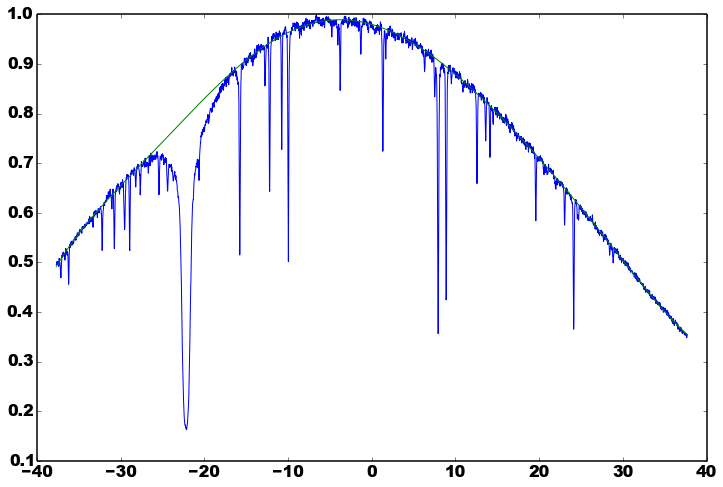

In [27]:
#get wavelength range:
wavspread = max(wav) - min(wav)

#center wavelength range about zero:
wavcent = wav - min(wav) - wavspread/2.

#normalize the spectrum:
normspec = spec/max(spec)

#make a function based on those 
#polynomial coefficients:
cfit = np.poly1d(z)

#plot the original spectrum:
plt.plot(wavcent, normspec)

#overplot the continuum fit
plt.plot(wavcent, cfit(wavcent))

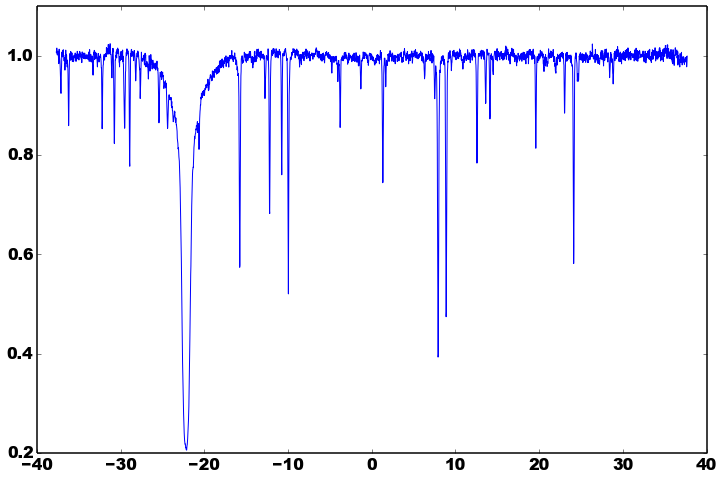

In [28]:
plt.plot(wavcent, normspec/cfit(wavcent))

### Fitting the Flats

Another option is to fit the blaze function using the master flat from that night. Aside from pixel-to-pixel variations, this should provide the best solution to what the blaze function looks like on an order by order basis.

In [140]:
flathdu = fits.open('/tous/mir7/flats/chi141029.slitflat.fits')
flatdata = flathdu[0].data
flatdata.shape

(3, 62, 3200)

In [141]:
scihdu = fits.open('/tous/mir7/fitspec/141029/achi141029.1143.fits')
scidata = scihdu[0].data
scidata.shape

(62, 3200, 2)

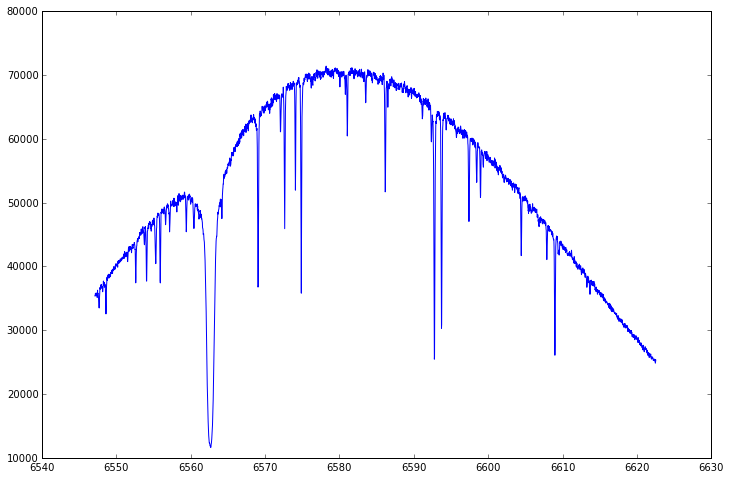

In [142]:
ord = 39
wav = scidata[ord,:,0]
spec = scidata[ord,:,1]
plt.plot(wav, spec)

(6547.1362, 6622.519)

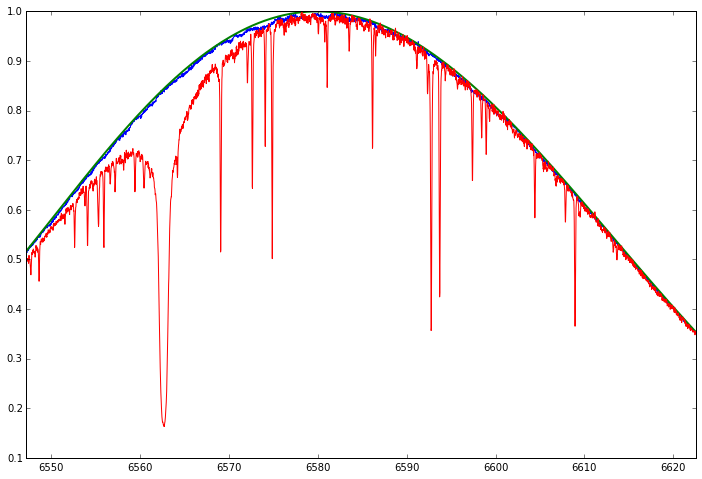

In [143]:
ord = 39
#plot summed flat:
normflat = flatdata[1,61 - ord,:]/np.max(flatdata[1,61 - ord,:])
plt.plot(scidata[ord,:,0], normflat[::-1])
#now superimpose polynomial fit
normfit = flatdata[2,61 - ord,:]/np.max(flatdata[2,61 - ord,:])
plt.plot(scidata[ord,:,0], normfit[::-1], lw=2)

#superimpose stellar spec
normspec_init = scidata[ord,:,1]/np.max(scidata[ord,:,1])
plt.plot(scidata[ord,:,0], normspec_init)
plt.xlim([np.min(scidata[ord,:,0]), np.max(scidata[ord,:,0])])

The CCD Fringing is already apparent at 6550 A, albeit at the .3% level. At 7100 A it is 1%.

0.00350059


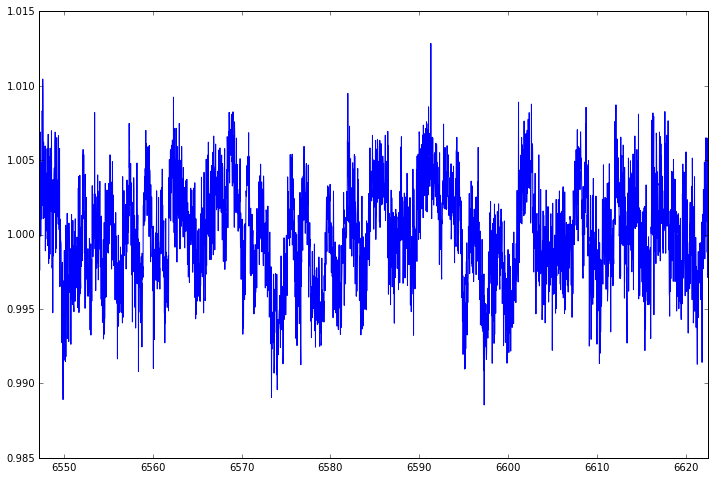

In [144]:
flatcorr = flatdata[0,61 - ord,:]
plt.plot(scidata[ord,:,0], flatcorr[::-1])
plt.xlim([np.min(scidata[ord,:,0]), np.max(scidata[ord,:,0])])
print(np.std(flatcorr[::-1]))

In [68]:
normspec = normspec_init/normfit[::-1]

(6547.1362, 6622.519)

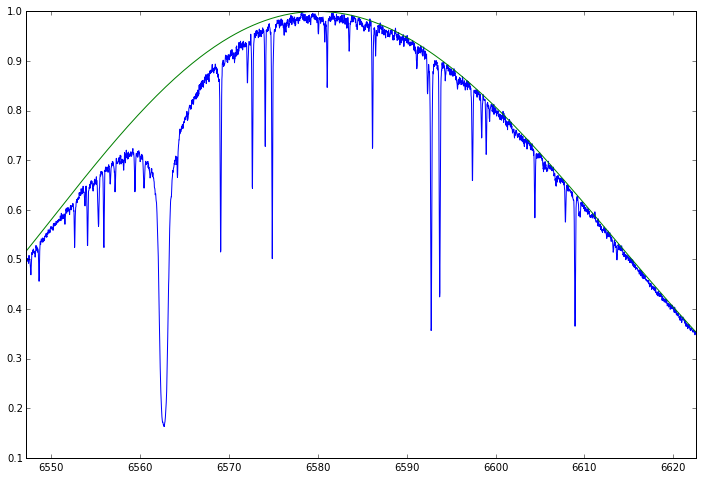

In [145]:
plt.plot(scidata[ord,:,0], normspec_init)
plt.plot(scidata[ord,:,0], normfit[::-1])
plt.xlim([np.min(scidata[ord,:,0]), np.max(scidata[ord,:,0])])

(6547.1362, 6622.519)

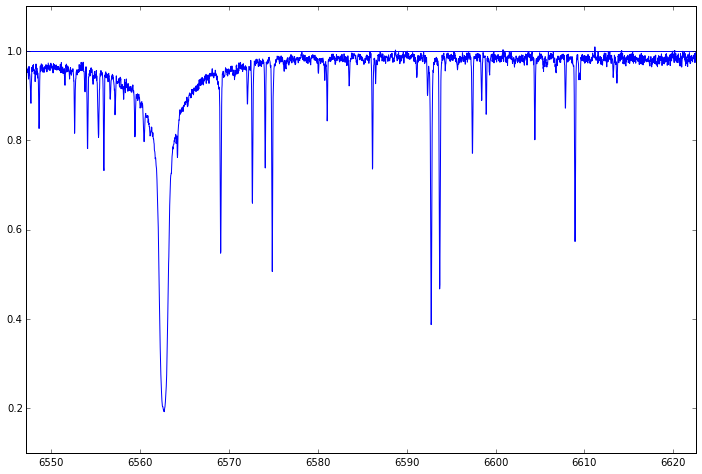

In [146]:
plt.plot(scidata[ord,:,0], normspec)
plt.axhline(y=1)
plt.xlim([np.min(scidata[ord,:,0]), np.max(scidata[ord,:,0])])

Now divide normspec by the max of the top 0.1% of points to renormalize. This removes small variations in the previous normalization due to shot noise.

In [99]:
#determine the number of maximum values to
#use in the normalization. In this case we
#will use the top 0.5%, which corresponds 
#to 16 elements for CHIRON:
nummax = np.int(np.ceil(0.005 * len(normspec)))
#now sort normspec and find the mean of the
#`nummax` highest values in the old normspec
mnhghval = np.mean(np.sort(normspec)[-nummax:-1])
#now renormalize by that value:
normspec = normspec / mnhghval

(6547.1362, 6622.519)

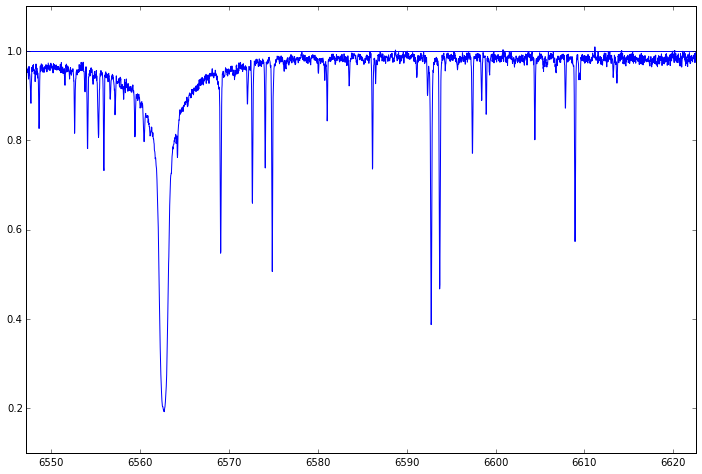

In [100]:
plt.plot(scidata[ord,:,0], normspec)
plt.axhline(y=1)
plt.xlim([np.min(scidata[ord,:,0]), np.max(scidata[ord,:,0])])

#### Testing out regular expression searching

I plan on using regular expressions to parse the date and root object name out of the input. In this section, I test the code that will be used to extract both variables

In [139]:
obnm = 'achi141029.1143.fits'
date = re.search(r'chi(\d{6})', obnm).group(1)
print(date)

141029


In [150]:
re.search(r'(chi\d{6}\.\d{4})', obnm).group(1)

'chi141029.1143'

### Testing  getChironSpec.py

In this section I will test `getChironSpec.py`.

In [179]:
from pyutil.getChironSpec import getChironSpec

In [180]:
myspec1 = getChironSpec('achi141029.1143.fits')
myspec2 = getChironSpec('achi150128.1140.fits')

In [181]:
myspec1.shape

(62, 3200, 2)

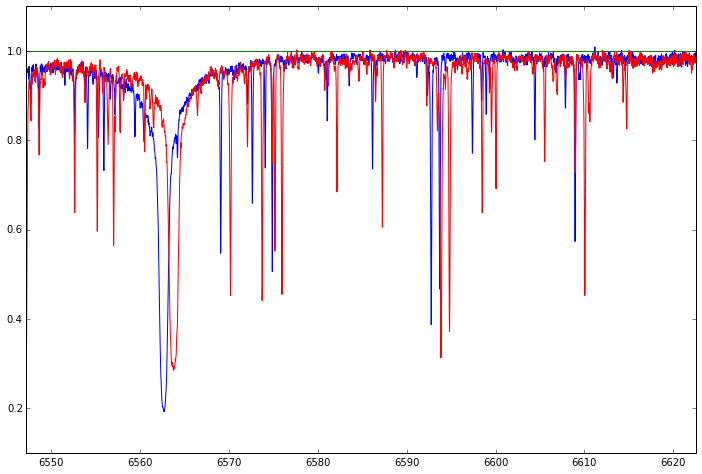

In [182]:
ord = 39
plt.plot(myspec1[ord, :, 0], myspec1[ord, :, 1])
minmax = [np.min(myspec1[ord, :, 0]), np.max(myspec1[ord, :, 0])]
plt.plot(minmax, [1, 1])
plt.xlim(minmax)
plt.plot(myspec2[ord, :, 0], myspec2[ord, :, 1])
